<a href="https://colab.research.google.com/github/DerinOgrenme2021/BurakHuseyinYanik/blob/main/Homework_California_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import logging
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from IPython.display import HTML, display
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [2]:
train_dataset = pd.read_csv('/content/sample_data/california_housing_test.csv')
test_dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [13]:
data_cleaner = [train_dataset, test_dataset]

In [14]:
print(train_dataset)

      longitude  latitude  ...  median_income  median_house_value
0       -122.05     37.37  ...         6.6085            344700.0
1       -118.30     34.26  ...         3.5990            176500.0
2       -117.81     33.78  ...         5.7934            270500.0
3       -118.36     33.82  ...         6.1359            330000.0
4       -119.67     36.33  ...         2.9375             81700.0
...         ...       ...  ...            ...                 ...
2995    -119.86     34.42  ...         1.1790            225000.0
2996    -118.14     34.06  ...         3.3906            237200.0
2997    -119.70     36.30  ...         2.2895             62000.0
2998    -117.12     34.10  ...         3.2708            162500.0
2999    -119.63     34.42  ...         8.5608            500001.0

[3000 rows x 9 columns]


In [15]:
print(train_dataset.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [16]:
print (test_dataset.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [17]:
for dataset in data_cleaner:
  dataset['housing_median_age'].fillna(dataset['housing_median_age'].median(), inplace = True)
  dataset['population'].fillna(dataset['population'].mode()[0], inplace = True)
  dataset['total_rooms'].fillna(dataset['total_rooms'].median(), inplace = True)

In [18]:
for dataset in data_cleaner:    
    dataset['RoomCount'] = dataset ['total_bedrooms'] + dataset['total_rooms'] + 1
    dataset['TotalRoom'] = (dataset['RoomCount'].notnull().astype('int'))

In [19]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

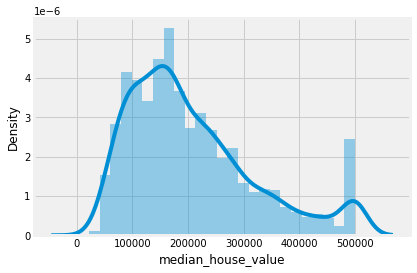

In [20]:
sns.distplot(train_dataset["median_house_value"])

In [21]:
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,RoomCount,TotalRoom
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,4547.0,1
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,1821.0,1
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,4097.0,1
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,83.0,1
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,1486.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,2093.0,1
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,6340.0,1
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,1158.0,1
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,111.0,1


In [22]:
print(train_dataset.corr())

                    longitude  latitude  ...  RoomCount  TotalRoom
longitude            1.000000 -0.925017  ...   0.053716        NaN
latitude            -0.925017  1.000000  ...  -0.044636        NaN
housing_median_age  -0.064203 -0.025143  ...  -0.363706        NaN
total_rooms          0.049865 -0.039632  ...   0.998396        NaN
total_bedrooms       0.070869 -0.068245  ...   0.955911        NaN
population           0.111572 -0.117318  ...   0.848891        NaN
households           0.051062 -0.068296  ...   0.931162        NaN
median_income       -0.018701 -0.072363  ...   0.190985        NaN
median_house_value  -0.050662 -0.138428  ...   0.149057        NaN
RoomCount            0.053716 -0.044636  ...   1.000000        NaN
TotalRoom                 NaN       NaN  ...        NaN        NaN

[11 rows x 11 columns]


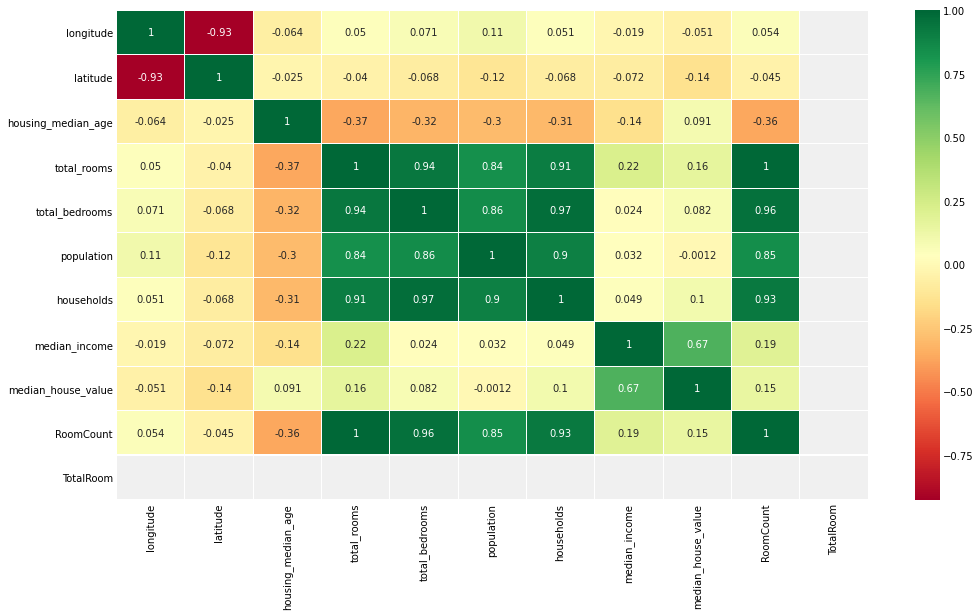

In [25]:
sns.heatmap(train_dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,9)
plt.show()

In [26]:
features_col=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
train_ds = train_dataset[features_col]
test_ds = test_dataset[features_col]
train_label = train_dataset['median_house_value']
print(train_ds.columns)
train_ds.head()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [27]:
one_hot_encoded_training_predictors = pd.get_dummies(train_ds)

In [28]:
training_scaler = StandardScaler()
one_hot_encoded_training_predictors = training_scaler.fit_transform(one_hot_encoded_training_predictors)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_training_predictors, train_label, test_size=0.20)

In [30]:
model = Sequential()

In [31]:
model.add(Dense(256, activation='relu',kernel_initializer='normal', input_dim=X_train.shape[1]))
model.add(Dense(128,kernel_initializer='normal', activation='relu'))
model.add(Dense(64,kernel_initializer='normal', activation='relu'))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))
model.add(Dense(1,kernel_initializer='normal', activation='sigmoid'))

In [34]:
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 45,569
Trainable params: 45,569
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, batch_size=5, epochs=50)

Epoch 1/50
480/480 [==============================] - 2s 2ms/step - loss: -895225167872.0000 - accuracy: 0.0000e+00
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: -77576739487744.0000 - accuracy: 0.0000e+00
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: -809021112057856.0000 - accuracy: 0.0000e+00
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: -3608846807334912.0000 - accuracy: 0.0000e+00
Epoch 5/50
480/480 [==============================] - 1s 2ms/step - loss: -10549222436765696.0000 - accuracy: 0.0000e+00
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: -24323928805605376.0000 - accuracy: 0.0000e+00
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: -48285980846718976.0000 - accuracy: 0.0000e+00
Epoch 8/50
480/480 [==============================] - 1s 2ms/step - loss: -85950602059710464.0000 - accuracy: 0.0000e+00
Epoch 9/50
480/480 [=======================

In [37]:
eval_model = model.evaluate(X_train, y_train)

75/75 [==============================] - 0s 1ms/step - loss: -135137323791343943680.0000 - accuracy: 0.0000e+00


In [38]:
eval_model = model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 2ms/step - loss: -119910767800413585408.0000 - accuracy: 0.0000e+00


In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [41]:
print(y_pred[:10])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [42]:
y_pred = (y_pred>0.5)

In [43]:
print(y_pred[:10])

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [44]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [21,  0,  0, ...,  0,  0,  0]])

In [45]:
report = classification_report(y_pred, y_test, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)

              precision  recall  f1-score  support
1.0                 0.0     0.0       0.0    600.0
39200.0             0.0     0.0       0.0      0.0
42700.0             0.0     0.0       0.0      0.0
44800.0             0.0     0.0       0.0      0.0
47500.0             0.0     0.0       0.0      0.0
...                 ...     ...       ...      ...
500000.0            0.0     0.0       0.0      0.0
500001.0            0.0     0.0       0.0      0.0
accuracy            0.0     0.0       0.0      0.0
macro avg           0.0     0.0       0.0    600.0
weighted avg        0.0     0.0       0.0    600.0

[509 rows x 4 columns]


In [50]:
accuracy_score(y_pred, y_test)

0.0

In [51]:
train_dataset=pd.read_csv("https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv")

In [52]:
train_dataset

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
train_dataset.describe

<bound method NDFrame.describe of        6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0      5  0    0    0    0    0  ...      0      0      0      0      0      0
1      7  0    0    0    0    0  ...      0      0      0      0      0      0
2      9  0    0    0    0    0  ...      0      0      0      0      0      0
3      5  0    0    0    0    0  ...      0      0      0      0      0      0
4      2  0    0    0    0    0  ...      0      0      0      0      0      0
...   .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
19994  0  0    0    0    0    0  ...      0      0      0      0      0      0
19995  1  0    0    0    0    0  ...      0      0      0      0      0      0
19996  2  0    0    0    0    0  ...      0      0      0      0      0      0
19997  9  0    0    0    0    0  ...      0      0      0      0      0      0
19998  5  0    0    0    0    0  ...      0      0      0      0      0      0

[19999 rows x 785

In [54]:
train_dataset.info

<bound method DataFrame.info of        6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0      5  0    0    0    0    0  ...      0      0      0      0      0      0
1      7  0    0    0    0    0  ...      0      0      0      0      0      0
2      9  0    0    0    0    0  ...      0      0      0      0      0      0
3      5  0    0    0    0    0  ...      0      0      0      0      0      0
4      2  0    0    0    0    0  ...      0      0      0      0      0      0
...   .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
19994  0  0    0    0    0    0  ...      0      0      0      0      0      0
19995  1  0    0    0    0    0  ...      0      0      0      0      0      0
19996  2  0    0    0    0    0  ...      0      0      0      0      0      0
19997  9  0    0    0    0    0  ...      0      0      0      0      0      0
19998  5  0    0    0    0    0  ...      0      0      0      0      0      0

[19999 rows x 785 c

In [55]:
X = train_dataset.drop("3",axis=1)
y = train_dataset["3"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=46)

In [56]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [63]:
earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, callbacks=[earlyStop])

Epoch 1/400
110/110 [==============================] - 1s 4ms/step - loss: 8463.9854 - val_loss: 8152.0498
Epoch 2/400
110/110 [==============================] - 0s 3ms/step - loss: 7943.5737 - val_loss: 7088.7329
Epoch 3/400
110/110 [==============================] - 0s 3ms/step - loss: 7391.5132 - val_loss: 6386.6973
Epoch 4/400
110/110 [==============================] - 0s 3ms/step - loss: 6880.8608 - val_loss: 5771.0571
Epoch 5/400
110/110 [==============================] - 0s 3ms/step - loss: 6613.7271 - val_loss: 5489.2642
Epoch 6/400
110/110 [==============================] - 0s 3ms/step - loss: 6516.1382 - val_loss: 5150.0352
Epoch 7/400
110/110 [==============================] - 0s 3ms/step - loss: 6127.5352 - val_loss: 4821.1865
Epoch 8/400
110/110 [==============================] - 0s 3ms/step - loss: 5954.9346 - val_loss: 4591.8374
Epoch 9/400
110/110 [==============================] - 0s 3ms/step - loss: 5790.9097 - val_loss: 4152.0200
Epoch 10/400
110/110 [===============

In [66]:
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

24.022486180067062

In [68]:
np.sqrt(mean_squared_error(y_test,predictions))

47.17923389817182